In [3]:
import pandas as pd 
file = "housing.data"
h = pd.read_csv(file,header = None,sep="\s+")
features = "CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT MEDV".split(" ")
h.columns = features
h.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid",context = "notebook")
cols = ["RM","MEDV","LSTAT","TAX","RAD"]
sns.pairplot(h[cols],height = 2)
plt.show()

<Figure size 1000x1000 with 30 Axes>

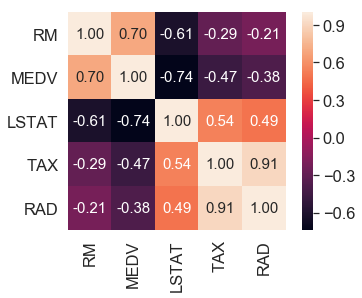

In [5]:
import numpy as np 
cm = np.corrcoef(h[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square = True, fmt = ".2f",annot_kws={'size': 15},yticklabels = cols,xticklabels = cols)
plt.show()

In [6]:
class LinearRegression:
    def __init__(self, edu = 0.001, n_iter = 20):
        self.edu = edu
        self.n_iter =  n_iter
        
    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    def predict(self, x):
        return self.net_input(x)
    
    def fit(self, x, y):
        y = y.reshape(-1)
        self.w_ = np.zeros(1 + x.shape[1] )
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(x)
            errors = y - output
            self.w_[1:] += self.edu * x.T.dot(errors)
            self.w_[0] += self.edu * errors.sum()
            cost = (errors**2).sum() / 2.0 
            self.cost_.append(cost)
        return self

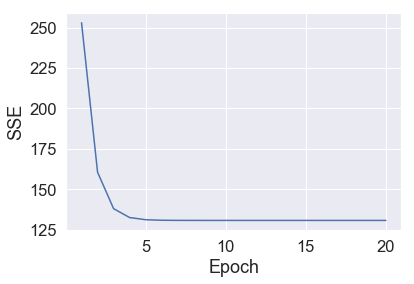

In [7]:
x = h[["RM"]].values 
y = h[["MEDV"]].values 

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()


x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

lr = LinearRegression()
lr.fit(x_std,y_std.T)

plt.plot(range(1, lr.n_iter+1), lr .cost_) 
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

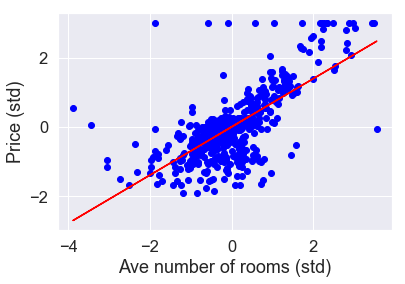

In [8]:
def lin_region(x,y,model):
    plt.scatter(x,y,c="blue")
    plt.plot(x,model.predict(x),color="red")
    return None

lin_region(x_std,y_std,lr)
plt.xlabel("Ave number of rooms (std)")
plt.ylabel("Price (std)")
plt.show()

In [9]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
ransac = RANSACRegressor(LinearRegression(),
                        max_trials = 100,
                        min_samples = 50,
                        #residual_metric = lambda x: np.sum(np.abs(x),axis = 1),
                        residual_threshold = 5.0,
                        random_state = 0)
none = ransac.fit(x,y)

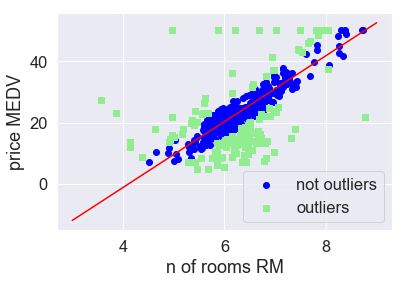

In [10]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_x = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_x[:,np.newaxis])
plt.scatter(x[inlier_mask],y[inlier_mask],c = "blue",
            marker = "o",label = "not outliers")
plt.scatter(x[outlier_mask],y[outlier_mask],c = "lightgreen",
            marker = "s",label = "outliers")
plt.plot(line_x,line_y_ransac,color = "red")
plt.xlabel("n of rooms RM")
plt.ylabel("price MEDV")
plt.legend(loc="best")
plt.show()

In [11]:
print("Intersection = {0}".format(ransac.estimator_.intercept_))
print("Alpha = {0}".format(ransac.estimator_.coef_[0]))

Intersection = [-44.08906429]
Alpha = [10.73450881]


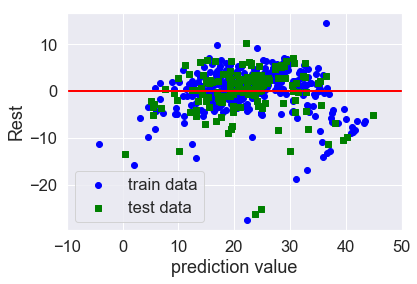

In [12]:
from sklearn.model_selection import train_test_split
x = h.iloc[:,:-1].values 
y = h["MEDV"].values 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

slr = LinearRegression()
slr.fit(x_train,y_train)
y_train_pred = slr.predict(x_train)
y_test_pred = slr.predict(x_test)

plt.scatter(y_train_pred,y_train_pred - y_train, 
            c = "blue",marker = "o",label="train data")

plt.scatter(y_test_pred,y_test_pred - y_test,
            c = "green",marker = "s",label="test data")

plt.xlabel("prediction value")
plt.ylabel("Rest")

plt.legend(loc = "best")
plt.hlines(y=0,xmin = -10,xmax = 50,lw = 2,color = "red")
plt.xlim([-10,50])
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
print("MSE train = {0:.2f} / test = {1:.2f}".format(
    mean_squared_error(y_train,y_train_pred),
mean_squared_error(y_test,y_test_pred)))

MSE train = 19.96 / test = 27.20


In [14]:
from sklearn.metrics import r2_score
print("R2 train = {0:.2f} / test = {1:.2f}".format(
    r2_score(y_train,y_train_pred),
r2_score(y_test,y_test_pred)))

R2 train = 0.76 / test = 0.67


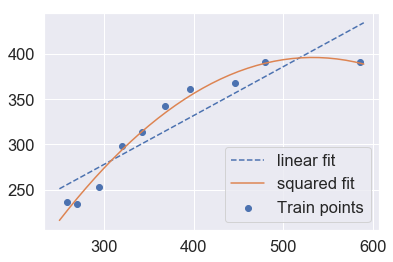

In [15]:
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures
x = np.array([258.0, 270.0, 294.0,
320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0] ) [:, np.newaxis]

y = np.array([236.4,234.4, 252.8 ,298.6, 314.2,342.2, 360.8, 368.0,391.2,
390.8]) 

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree = 2)


x_quad = quadratic.fit_transform(x)
pr.fit(x_quad,y)
lr.fit(x,y)


x_fit = np.arange(250,600,10) [:, np.newaxis]
y_lin_fit = lr.predict(x_fit)

x_fit_quad = quadratic.fit_transform(x_fit)
y_quad_fit = pr.predict(x_fit_quad)




plt.scatter(x,y,label = "Train points")
plt.plot(x_fit,y_lin_fit,label = "linear fit", linestyle = "--")
plt.plot(x_fit,y_quad_fit,label = "squared fit")
plt.legend(loc="best")
plt.show()




In [16]:
y_lin_pred = lr.predict(x)
y_quad_pred = pr.predict(x_quad)

print("Train MSE linear = {0:.3f} / squared = {1:.3f}".format(
    mean_squared_error(y,y_lin_pred),
mean_squared_error(y,y_quad_pred)))


print("Train R2 linear = {0:.3f} / squared = {1:.3f}".format(
    r2_score(y,y_lin_pred),
r2_score(y,y_quad_pred)))





Train MSE linear = 569.780 / squared = 61.330
Train R2 linear = 0.832 / squared = 0.982


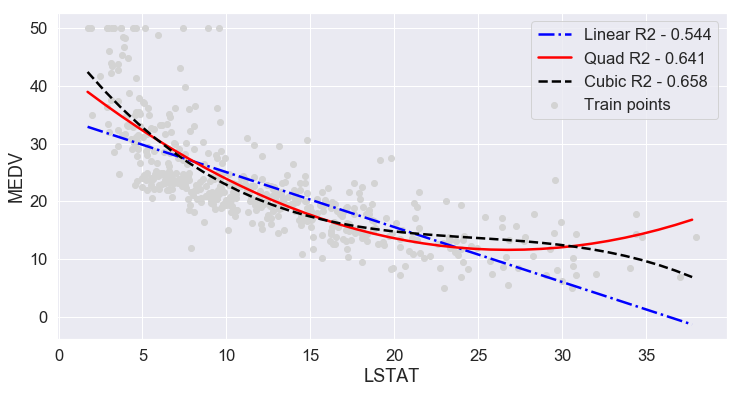

In [17]:
x = h[["LSTAT"]].values 
y = h["MEDV"].values 

regr = LinearRegression()
quadratic = PolynomialFeatures(degree = 2)
cubic = PolynomialFeatures(degree = 3)

x_quad = quadratic.fit_transform(x)
x_cubic = cubic.fit_transform(x)


x_fit = np.arange(x.min(),x.max(),1)[:,np.newaxis]

#linear fit 
regr = regr.fit(x,y)
y_lin_pred = regr.predict(x_fit)
linear_r2 = r2_score(y,regr.predict(x))

#squad fit 
regr = regr.fit(x_quad,y)
y_quad_pred = regr.predict(quadratic.fit_transform(x_fit))
quad_r2 = r2_score(y,regr.predict(x_quad))

#cubic fit 
regr = regr.fit(x_cubic,y)
y_cubic_pred = regr.predict(cubic.fit_transform(x_fit))
cubic_r2 = r2_score(y,regr.predict(x_cubic))


plt.figure(figsize=(12,6))
plt.scatter(x,y,label = "Train points",color = "lightgray")
plt.plot(x_fit, y_lin_pred, label = "Linear R2 - {0:.3f}".format(linear_r2),
        color = "blue",
        lw = 2.5,
        linestyle = "-.")

plt.plot(x_fit, y_quad_pred, label = "Quad R2 - {0:.3f}".format(quad_r2),
        color= "red",
        lw = 2.5,
        linestyle = "-")

plt.plot(x_fit, y_cubic_pred, label = "Cubic R2 - {0:.3f}".format(cubic_r2),
        color = "black",
        lw = 2.5,
        linestyle = "--")

plt.xlabel("LSTAT")
plt.ylabel("MEDV")

plt.legend(loc = "best")
plt.show()

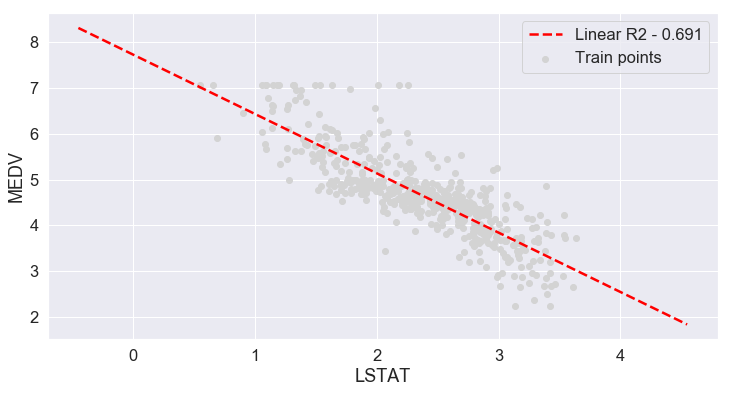

In [18]:
x_log = np.log(x)
y_sqrt = np.sqrt(y)

x_fit = np.arange(x_log.min()-1,x_log.max()+1,1)[:,np.newaxis]

regr = regr.fit(x_log,y_sqrt)
y_lin_pred = regr.predict(x_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(x_log))


plt.figure(figsize=(12,6))

plt.scatter(x_log,y_sqrt , label = "Train points",color = "lightgray")
plt.plot(x_fit, y_lin_pred, label = "Linear R2 - {0:.3f}".format(linear_r2),
        color = "red",
        lw = 2.5,
        linestyle = "--")

plt.xlabel("LSTAT")
plt.ylabel("MEDV")

plt.legend(loc = "best")
plt.show()


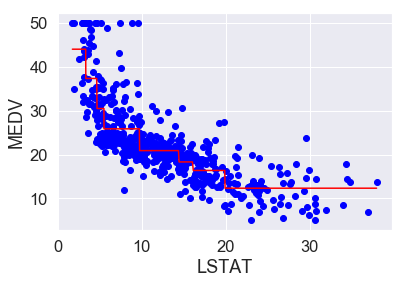

In [28]:
from sklearn.tree import DecisionTreeRegressor

x = h[["LSTAT"]].values 
y = h["MEDV"].values 

tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(x,y)

sort_idx = x.flatten().argsort()

lin_region(x[sort_idx],y[sort_idx],tree)

plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

In [33]:
x = h.iloc[:,:-1].values 
y = h["MEDV"].values 

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                test_size = 0.4,
                                                random_state = 1)

from sklearn.ensemble import RandomForestRegressor 

forest = RandomForestRegressor(n_estimators = 1000,
                              criterion = "mse",
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
y_train_pred = forest.predict(x_train)
y_test_pred = forest.predict(x_test)


print("MSE train = {0:.3f} / test = {1:.3f}".format(
    mean_squared_error(y_train,y_train_pred),
mean_squared_error(y_test,y_test_pred)))

print("R2 train = {0:.3f} / test = {1:.3f}".format(
    r2_score(y_train,y_train_pred),
r2_score(y_test,y_test_pred)))

MSE train = 1.641 / test = 11.056
R2 train = 0.979 / test = 0.878


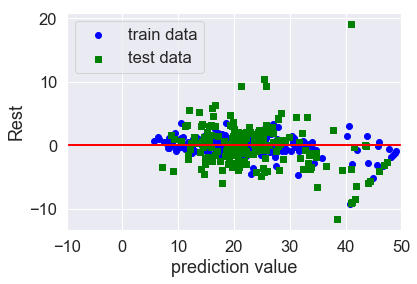

In [34]:
plt.scatter(y_train_pred,y_train_pred - y_train, 
            c = "blue",marker = "o",label="train data")

plt.scatter(y_test_pred,y_test_pred - y_test,
            c = "green",marker = "s",label="test data")

plt.xlabel("prediction value")
plt.ylabel("Rest")

plt.legend(loc = "best")
plt.hlines(y=0,xmin = -10,xmax = 50,lw = 2,color = "red")
plt.xlim([-10,50])
plt.show()